In [ ]:
import pandas as pd

# Load CSV file
# Replace 'nombre_archivo.csv' with the actual name of your CSV file
# Note: data may be separated by "," or ";"
try:
    df = pd.read_csv('personality_dataset.csv', sep=",")

    # Check the first rows
    print("First 5 rows of the DataFrame:")
    print(df.head())

    # Check general structure of the DataFrame
    print("\nGeneral information of the DataFrame:")
    df.info()

except FileNotFoundError:
    print("Error: The file 'nombre_archivo.csv' was not found. Make sure the file is in the correct location or provide the full path.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")


Primeras 5 filas del DataFrame:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Información general del DataFrame:
<class 'panda

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
# Create two separate lists with the names of numerical and categorical variables 
# to treat them differently in the analysis.
# Define some variables that are categorical but appear in the dataset as numerical nominal

# List of variables that are categorical but represented as numerical
# categorical_numerical_vars = ['Gender'] # Add here the names of your variables

# Separate columns into lists of numerical and categorical variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Move the specified variables from the numerical list to the categorical list if they exist in the numerical list
# for var in categorical_numerical_vars:
#     if var in numeric_cols:
#         numeric_cols.remove(var)
#         categorical_cols.append(var)

print("Numerical variables:", numeric_cols)
print("Categorical variables:", categorical_cols)


Variables numéricas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
Variables categóricas: ['Stage_fear', 'Drained_after_socializing', 'Personality']


In [ ]:
# Check for missing values by column
print("\nMissing values per column before removal:")
print(df.isnull().sum())

# Remove rows with any missing values
df.dropna(inplace=True)

# Check for missing values by column using isnull().sum() and remove them

# Verify if there are missing values by column
print("Number of missing values per column before removal:")
print(df.isnull().sum())

# Remove rows with any missing values
df.dropna(inplace=True)

print("\nDataFrame after removing rows with missing values:")
print(df.head())

print("\nNumber of missing values per column after removal:")
print(df.isnull().sum())



Valores nulos por columna antes de eliminar:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Número de valores nulos por columna antes de la eliminación:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

DataFrame después de eliminar filas con valores nulos:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0

In [ ]:
# Convert categorical columns to numbers using LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nDataFrame after encoding with LabelEncoder:")
print(df.head())

# Check data types after encoding
print("\nData types after encoding:")
df.dtypes



DataFrame después de la codificación con LabelEncoder:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  

Tipos 

,0
Time_spent_Alone,float64
Stage_fear,int64
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,int64
Friends_circle_size,float64
Post_frequency,float64
Personality,int64


In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,0.486207,3.963354,3.000000,0.485172,6.268863,3.564727,0.485862
std,3.441180,0.499896,2.872608,2.221597,0.499866,4.232340,2.893587,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.963354,3.000000,0.000000,5.000000,3.000000,0.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [ ]:
# Identify duplicate records with `duplicated().sum()` and remove them with `drop_duplicates()`

# Identify duplicates
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate records before removal: {num_duplicates}")

# Remove duplicates
df_cleaned = df.drop_duplicates()
print("\nDataFrame after removing duplicate records:")
print(df_cleaned.head())
print(f"\nNumber of records after removing duplicates: {len(df_cleaned)}")

# Update original DataFrame without duplicates
df = df.drop_duplicates()
print(f"Remaining duplicates: {df.duplicated().sum()}")




Número de registros duplicados antes de la eliminación: 402

DataFrame después de eliminar registros duplicados:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0  

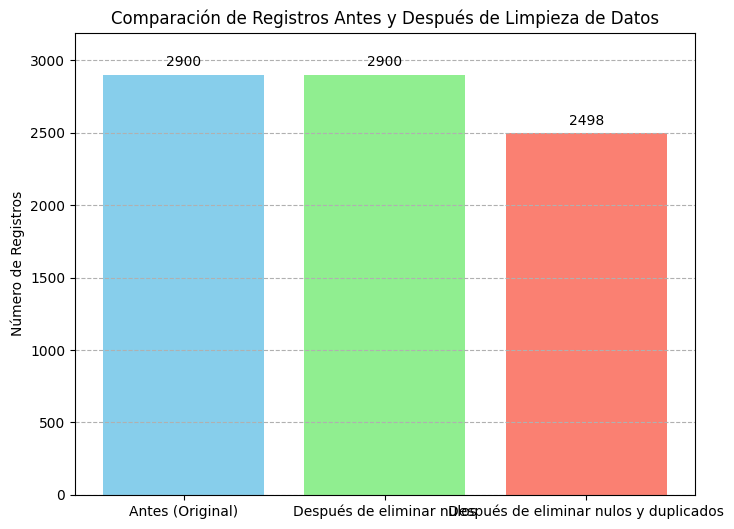

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of records before removing nulls and duplicates
num_records_before = len(df_cleaned)  # df_cleaned already has nulls and duplicates removed

# To get the number of records BEFORE removing nulls and duplicates, we need the original dataframe
# Let's reload the original dataframe for this purpose
try:
    df_original = pd.read_csv('personality_datasert.csv', sep=",")
    num_records_original = len(df_original)

    # Remove only nulls to see the impact of null removal
    df_after_dropna = df_original.dropna()
    num_records_after_dropna = len(df_after_dropna)

    # Number of records after removing nulls and duplicates (already in df_cleaned)
    num_records_after_cleaning = len(df_cleaned)

    # Create the data for the plot
    labels = ['Before (Original)', 'After removing nulls', 'After removing nulls and duplicates']
    counts = [num_records_original, num_records_after_dropna, num_records_after_cleaning]

    # Create bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'salmon'])
    plt.ylabel('Number of Records')
    plt.title('Comparison of Records Before and After Data Cleaning')
    plt.ylim(0, max(counts) * 1.1)  # Adjust y-axis limit
    plt.grid(axis='y', linestyle='--')

    # Add values above bars
    for i, count in enumerate(counts):
        plt.text(i, count + max(counts) * 0.02, str(count), ha='center')

    plt.show()

except FileNotFoundError:
    print("Error: The file 'personality_datasert.csv' was not found. Cannot generate comparison chart.")
except Exception as e:
    print(f"An error occurred while generating the comparison chart: {e}")


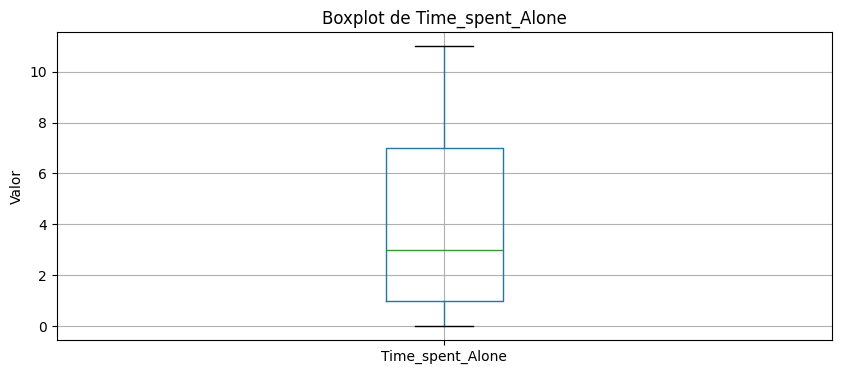

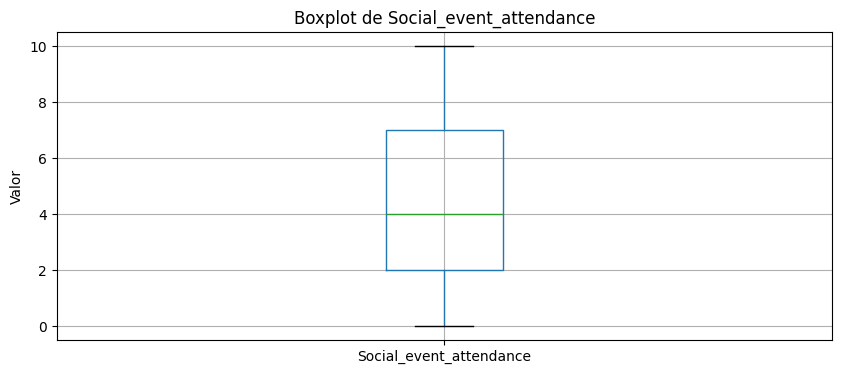

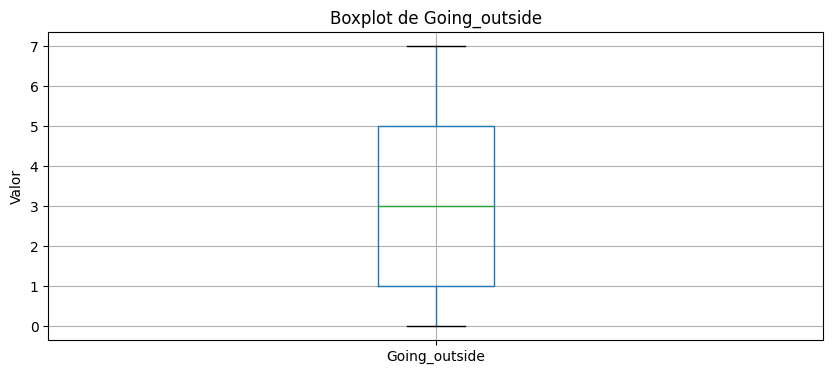

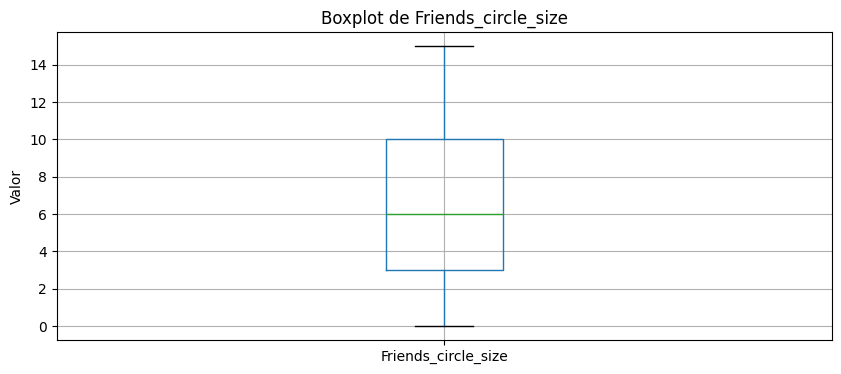

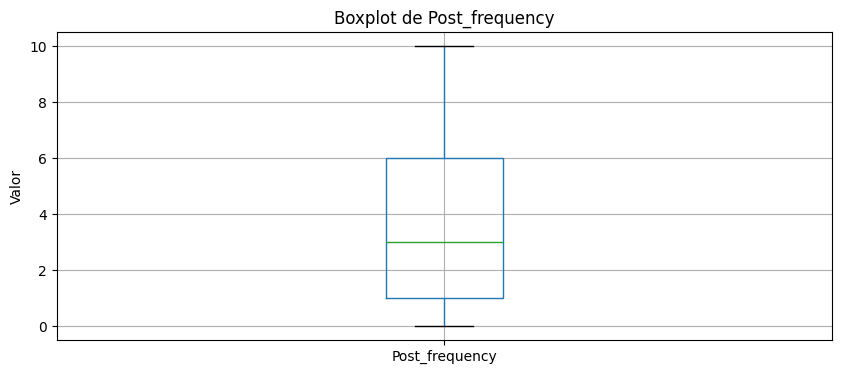

In [ ]:
# Aply `boxplot` and show outliers

import matplotlib.pyplot as plt
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valor')

Número de valores atípicos detectados en 'Time_spent_Alone': 0
Registros después de eliminar valores atípicos en 'Time_spent_Alone': 2498
------------------------------
Número de valores atípicos detectados en 'Social_event_attendance': 0
Registros después de eliminar valores atípicos en 'Social_event_attendance': 2498
------------------------------
Número de valores atípicos detectados en 'Going_outside': 0
Registros después de eliminar valores atípicos en 'Going_outside': 2498
------------------------------
Número de valores atípicos detectados en 'Friends_circle_size': 0
Registros después de eliminar valores atípicos en 'Friends_circle_size': 2498
------------------------------
Número de valores atípicos detectados en 'Post_frequency': 0
Registros después de eliminar valores atípicos en 'Post_frequency': 2498
------------------------------

DataFrame después de eliminar valores atípicos de todas las variables numéricas:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going

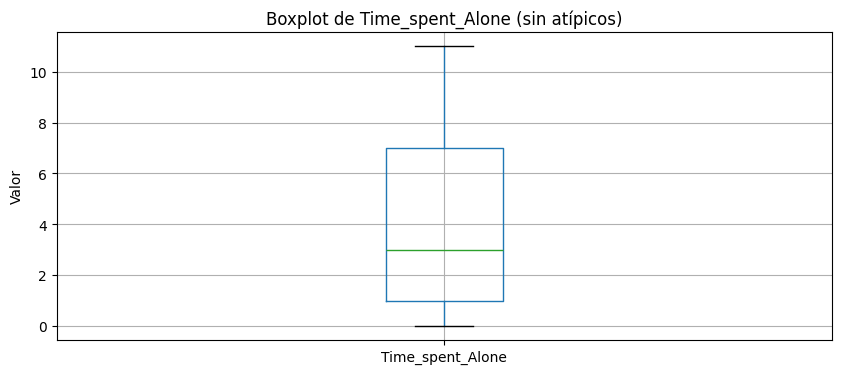

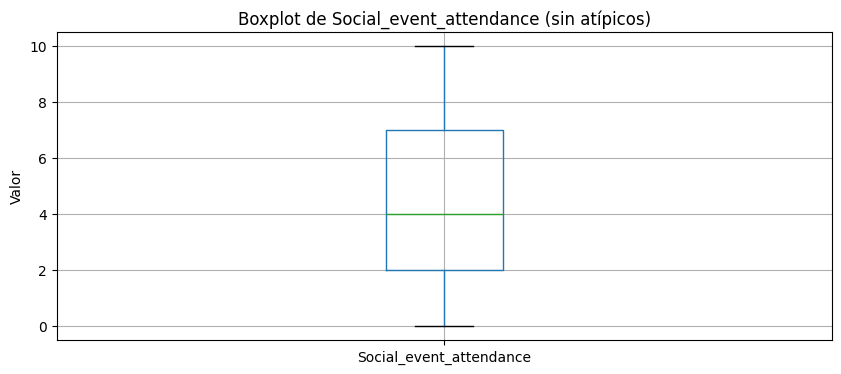

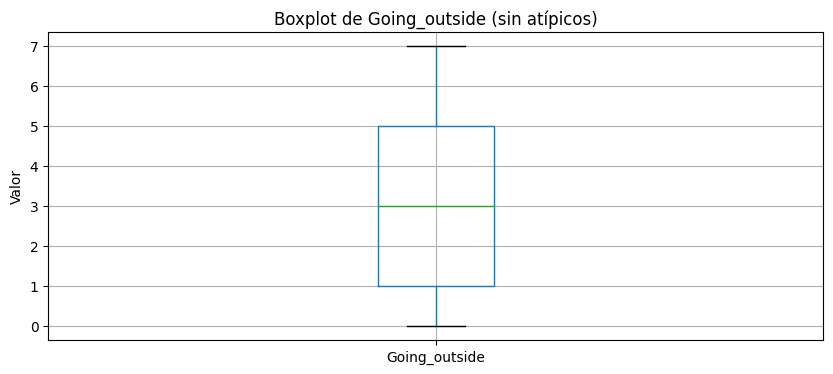

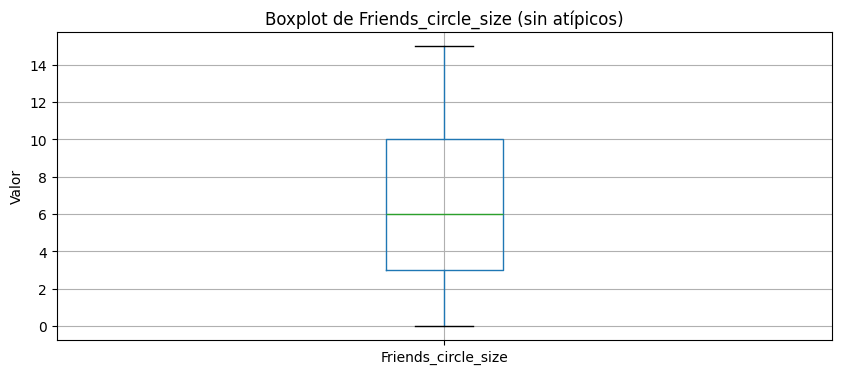

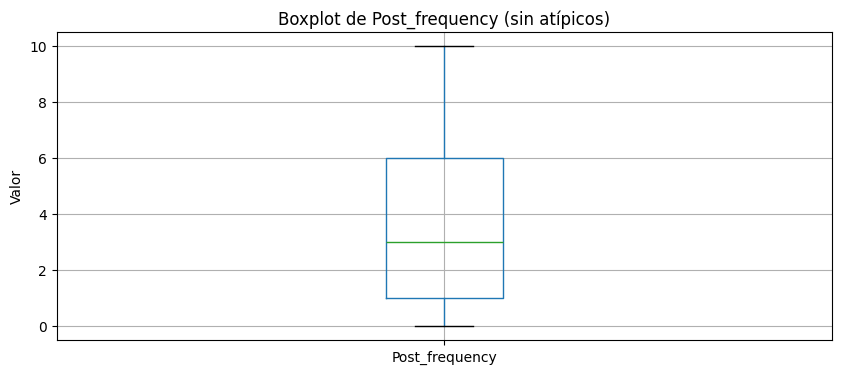

In [ ]:
# Identify y drop outliers in numerical variables using the Interquartile Range (IQR)

import matplotlib.pyplot as plt
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Número de valores atípicos detectados en '{column}': {len(outliers)}")

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Registros después de eliminar valores atípicos en '{column}': {len(df_cleaned)}")

    return df_cleaned

# Apply outlier removal to each numeric column
df_no_outliers = df_cleaned.copy() # Start with the DataFrame without duplicates

for col in numeric_cols:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)
    print("-" * 30)

print("\nDataFrame después de eliminar valores atípicos de todas las variables numéricas:")
print(df_no_outliers.head())
print(f"\nNúmero final de registros después de eliminar duplicados y valores atípicos: {len(df_no_outliers)}")


for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    df_no_outliers.boxplot(column=col)
    plt.title(f'Boxplot de {col} (sin atípicos)')
    plt.ylabel('Valor')
    plt.show()

In [ ]:
# share dataframe called proyecto_limpio

df_cleaned.to_csv('proyecto_limpio.csv', sep=';', index=False)
print("\nDataFrame guardado como 'proyecto_limpio.csv' con separador ';'")


DataFrame guardado como 'proyecto_limpio.csv' con separador ';'


In [ ]:
# cuantos datos atipicos se eliminaron?

# Calcular el total de registros removidos desppues de los outliers
num_records_before_outliers = len(df_cleaned) # df_cleaned es el dataframe despues de eliminar los nulos y los duplicados

# despues de correrlo, df_no_outliers tiene el dataframe final
num_records_after_outliers = len(df_no_outliers)

# Calcular el numero de outliers eliminados
num_outliers_removed = num_records_before_outliers - num_records_after_outliers

print(f"\nSe eliminaron un total de {num_outliers_removed} datos atípicos.")



Se eliminaron un total de 0 datos atípicos.


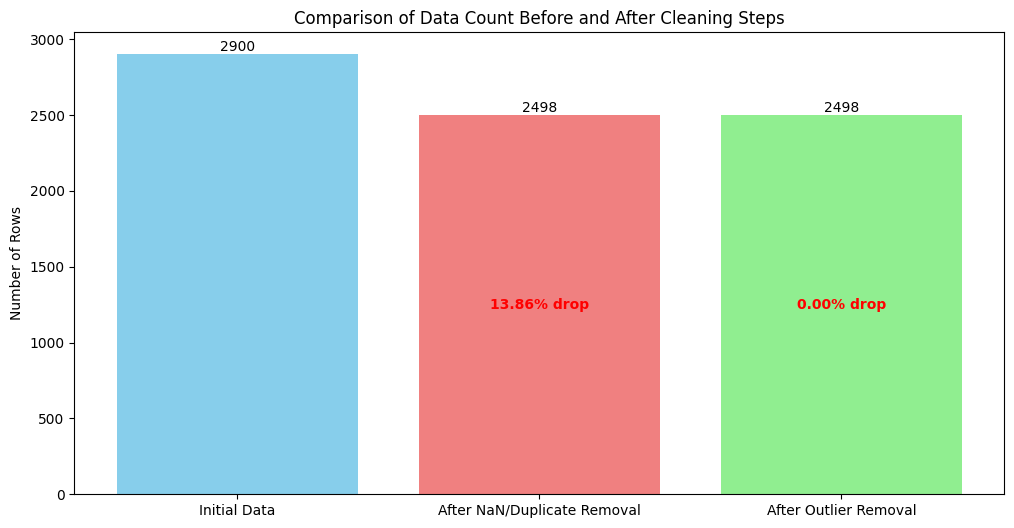


Summary of Data Reduction:
Initial rows: 2900
Rows after NaN and duplicate removal: 2498 (13.86% drop)
Final rows after outlier removal: 2498 (0.00% drop from previous step)
Total percentage drop from initial data: 13.86%


In [ ]:
# Give me a graph that contains both the original data and the data after removal, 
# showing the percentage drop of different data points and the difference between before and after removal

# Calculate the initial number of rows
initial_rows = len(df)

# Calculate the number of rows after removing nulls and duplicates
rows_after_nans_duplicates = len(df_cleaned)

# Calculate the final number of rows after removing outliers
final_rows = len(df_no_outliers)

# Calculate the percentage drops
percentage_drop_nans_duplicates = ((initial_rows - rows_after_nans_duplicates) / initial_rows) * 100
percentage_drop_outliers = ((rows_after_nans_duplicates - final_rows) / rows_after_nans_duplicates) * 100
total_percentage_drop = ((initial_rows - final_rows) / initial_rows) * 100

# Create data for the chart
labels = ['Initial Data', 'After NaN/Duplicate Removal', 'After Outlier Removal']
counts = [initial_rows, rows_after_nans_duplicates, final_rows]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add counts and percentages on top of the bars
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center') # Show the count

    if i == 1:
        plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{percentage_drop_nans_duplicates:.2f}% drop', va='center', ha='center', color='red', fontweight='bold')
    elif i == 2:
        plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{percentage_drop_outliers:.2f}% drop', va='center', ha='center', color='red', fontweight='bold')

plt.title('Comparison of Data Count Before and After Cleaning Steps')
plt.ylabel('Number of Rows')
plt.show()

print(f"\nSummary of Data Reduction:")
print(f"Initial rows: {initial_rows}")
print(f"Rows after NaN and duplicate removal: {rows_after_nans_duplicates} ({percentage_drop_nans_duplicates:.2f}% drop)")
print(f"Final rows after outlier removal: {final_rows} ({percentage_drop_outliers:.2f}% drop from previous step)")
print(f"Total percentage drop from initial data: {total_percentage_drop:.2f}%")


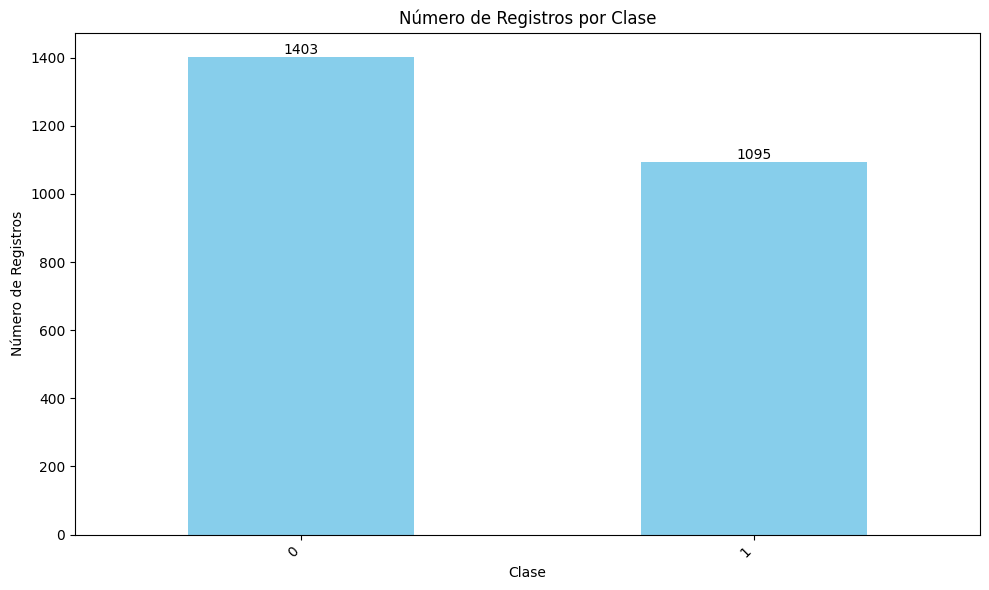

In [ ]:
# Generate a bar chart of how many records exist per class

import matplotlib.pyplot as plt
# Replace 'nombre_de_la_columna_clase' with the actual name of the column containing the classes
class_column_name = 'Personality' # Replace with the name of your class column

if class_column_name in df_cleaned.columns:
    # Count the frequency of each class
    class_counts = df_cleaned[class_column_name].value_counts()

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Records per Class')
    plt.xlabel('Class')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45, ha='right') # Rotate X-axis labels if they are long
    plt.tight_layout() # Adjust layout to prevent label cutoff

    # Add values on top of the bars
    for index, value in enumerate(class_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    plt.show()
else:
    print(f"Error: The column '{class_column_name}' is not found in the DataFrame.")

# If you want to use the DataFrame without outliers for class count
# Replace df_cleaned with df_no_outliers if that's the case
# class_counts_no_outliers = df_no_outliers[class_column_name].value_counts()
# ... (rest of the code for the chart using class_counts_no_outliers)



Clases encontradas en la columna 'Personality': [0 1]

Creando histogramas para la columna: Time_spent_Alone


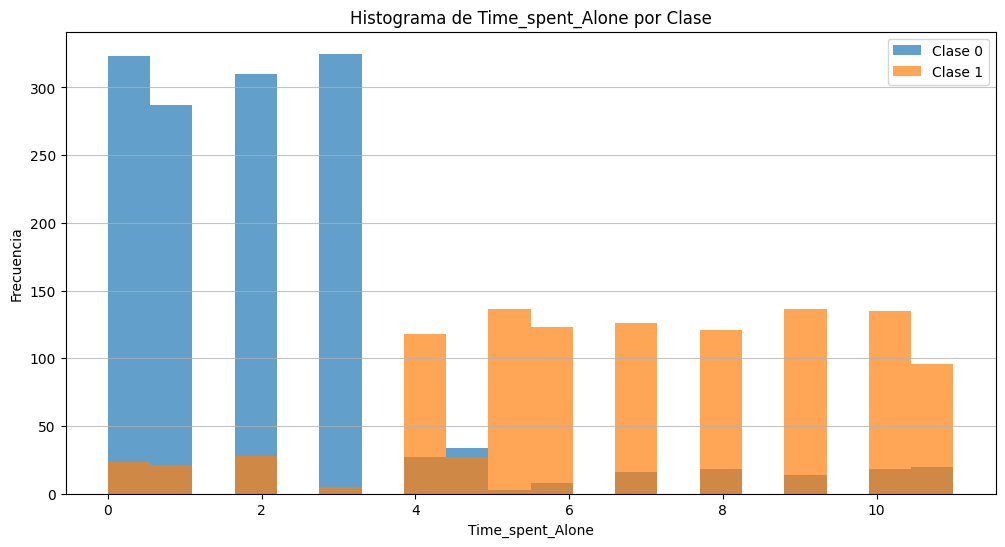


Creando histogramas para la columna: Social_event_attendance


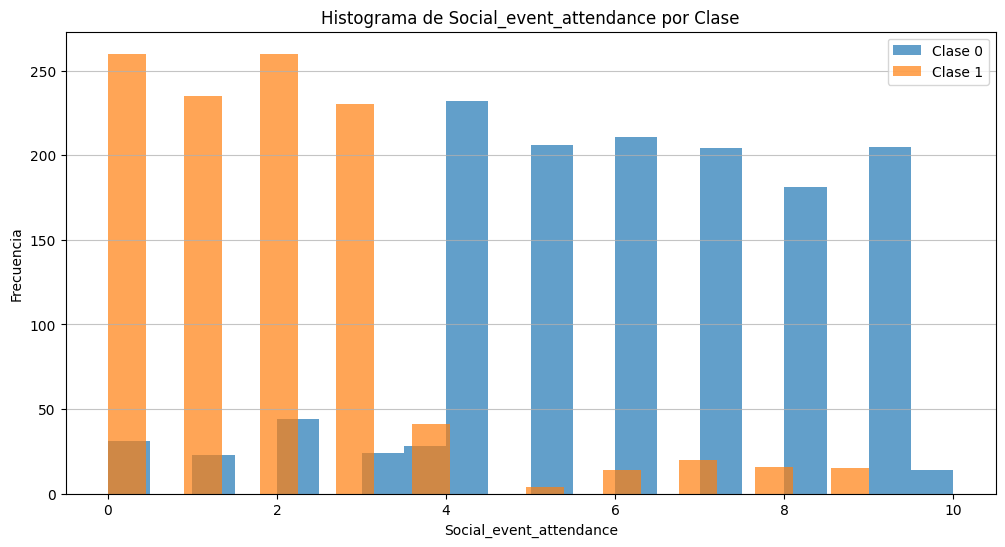


Creando histogramas para la columna: Going_outside


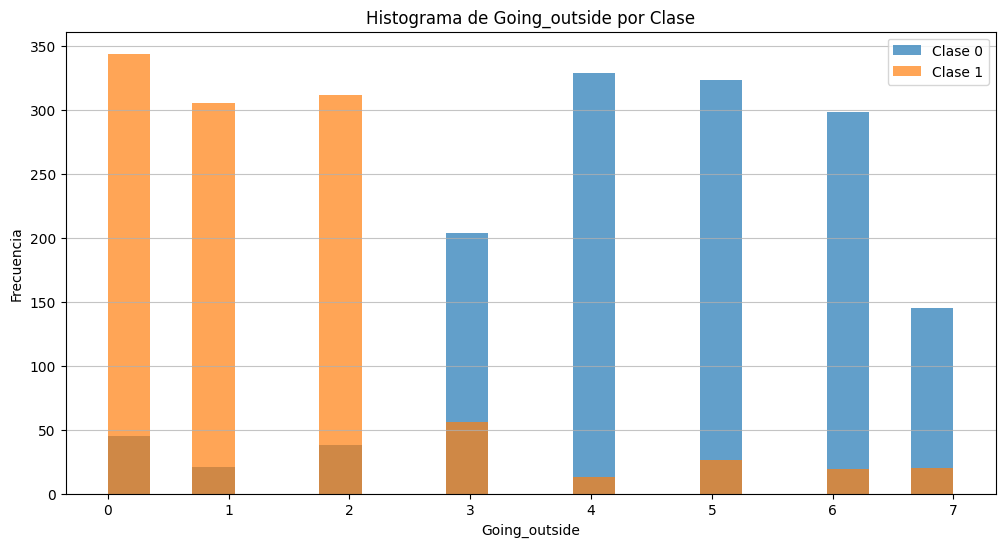


Creando histogramas para la columna: Friends_circle_size


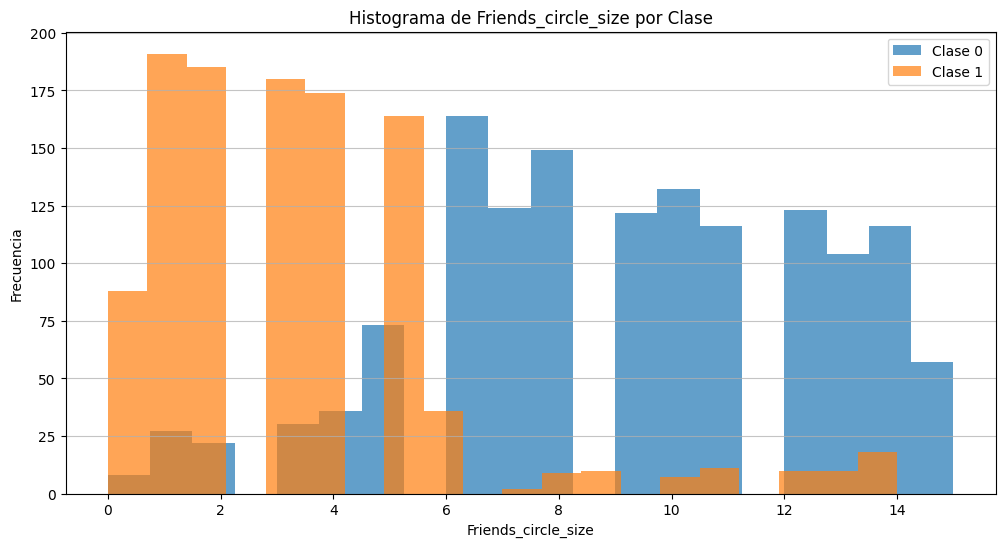


Creando histogramas para la columna: Post_frequency


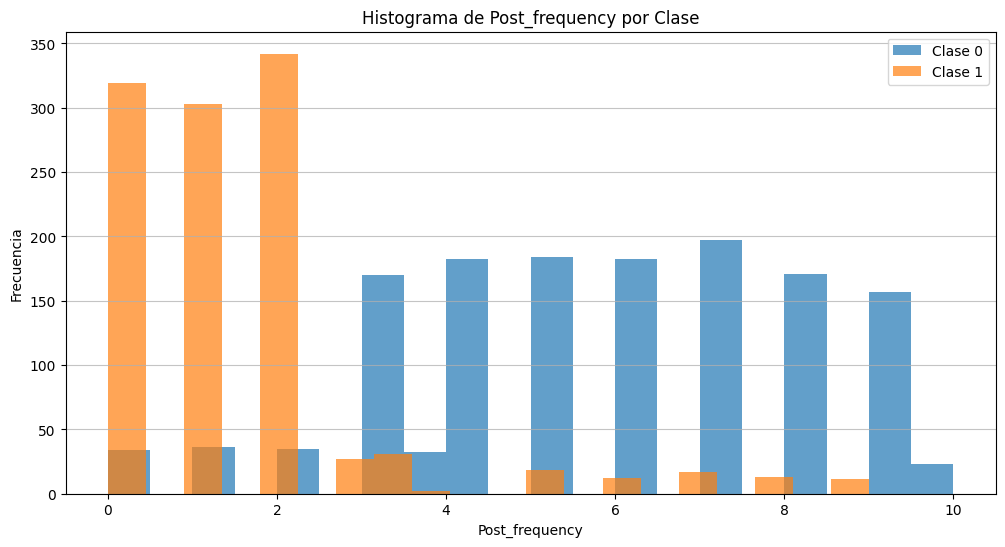


Proceso de histogramas por clase completado.


In [ ]:
import matplotlib.pyplot as plt
# Create histograms per class for each numerical column
class_column = 'Personality' # The column that indicates the class

# Verify that the class column exists in the DataFrame
if class_column not in df.columns:
    print(f"Error: The class column '{class_column}' was not found in the DataFrame.")
else:
    # Get unique classes in the class column
    classes = df[class_column].unique()
    print(f"\nClasses found in the column '{class_column}': {classes}")

    # Iterate over each numerical column
    for col in numeric_cols:
        print(f"\nCreating histograms for the column: {col}")
        plt.figure(figsize=(12, 6)) # Adjust the figure size as needed

        # Iterate over each class and plot its histogram
        for cls in classes:
            # Filter the DataFrame for the current class
            df_class = df[df[class_column] == cls]

            # Plot the histogram for the current class
            # 'alpha' controls transparency, allowing histograms to overlap
            plt.hist(df_class[col], bins=20, alpha=0.7, label=f'Class {cls}', density=False) # density=False for frequency

        plt.title(f'Histogram of {col} by Class')
        plt.xlabel(col)
        plt.ylabel('Frequency') # Y axis is the frequency
        plt.legend() # Show the legend to identify the classes
        plt.grid(axis='y', alpha=0.75) # Add a grid on the y-axis
        plt.show()

    print("\nHistograms by class process completed.")



Columnas seleccionadas para pairplot (mayor varianza): ['Friends_circle_size', 'Time_spent_Alone', 'Post_frequency', 'Social_event_attendance', 'Going_outside']


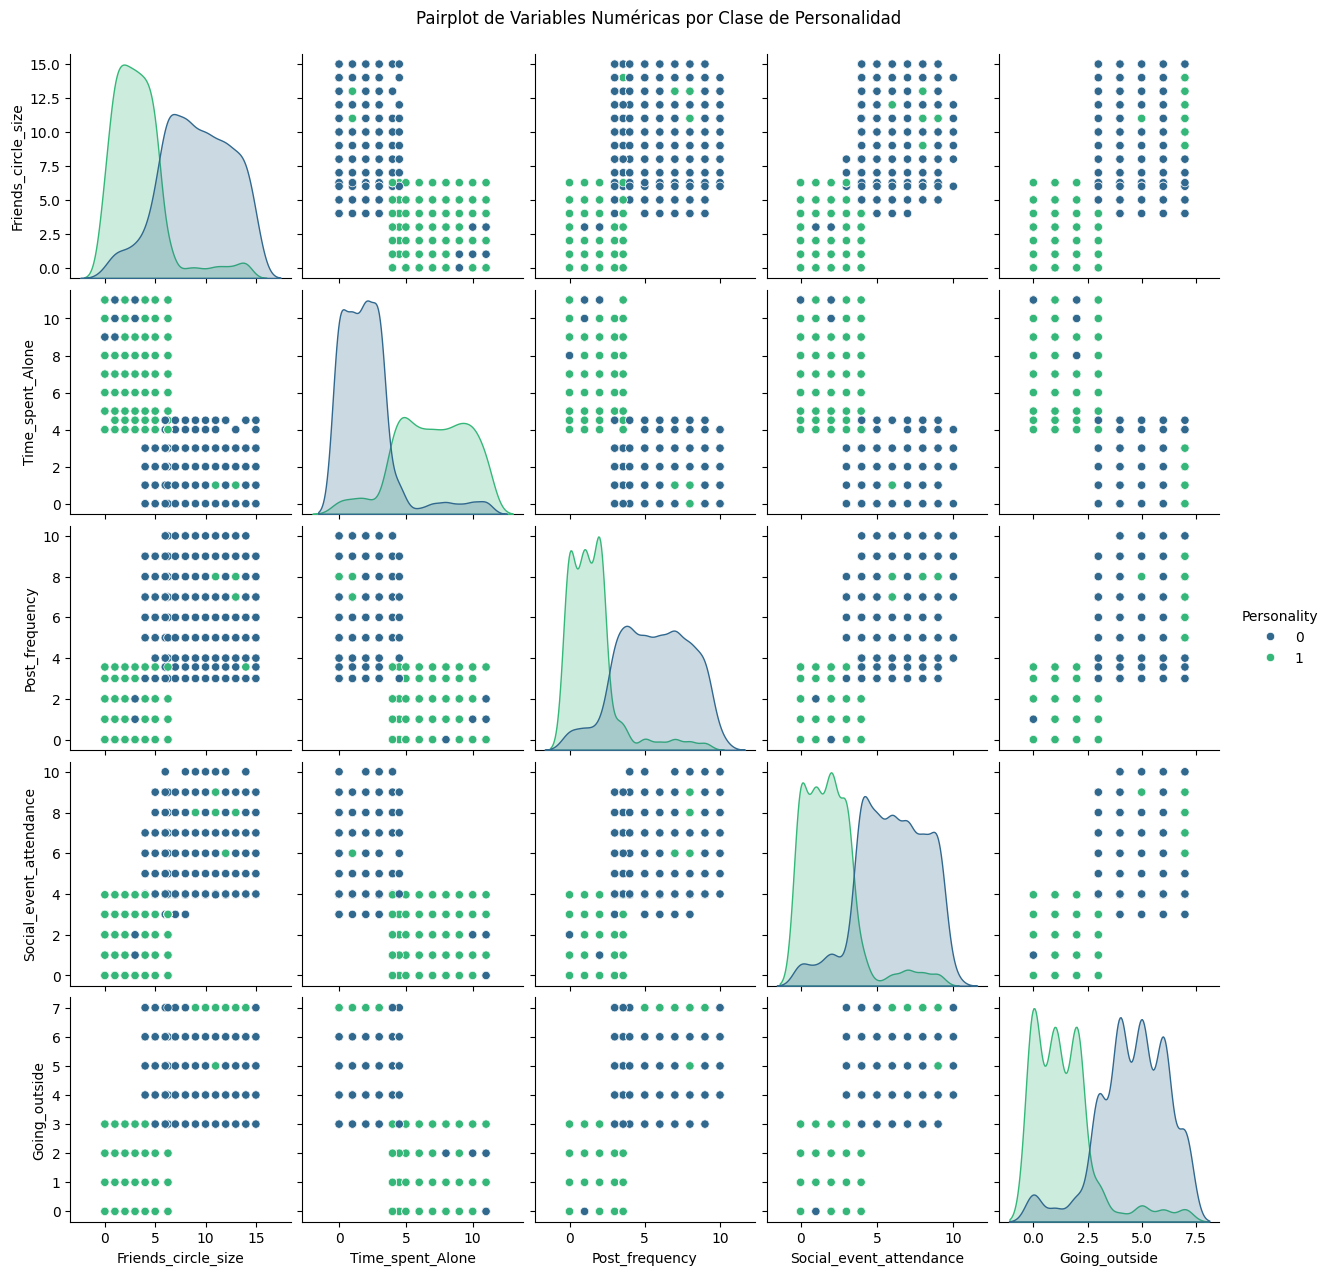


Pairplot generado.


In [ ]:
# Use `pairplot()` to visually explore the relationships between pairs of numerical variables, separated by target class. The target class is "Personality"
# If there are more than 4 numerical columns, plot only the first 5 with the highest variance
# Use different distinguishable colors

import matplotlib.pyplot as plt
import seaborn as sns

# Make sure that 'Personality' is in numeric_cols after encoding if necessary.
# If Personality is the target class, it should not be in the numeric columns used for the pairplot,
# but rather should be the column used to color the points in the pairplot.
# Assuming that 'Personality' is a numeric column or has already been encoded and treated as such
# in the DataFrame 'df_no_outliers'. If it is originally categorical, you should use the original df or encode it.
# For pairplot with 'hue', the column 'Personality' must be numeric (encoded) or categorical.

# Make sure you have the final DataFrame cleaned without outliers and duplicates
# df_no_outliers is the resulting DataFrame from the previous code

# Select only numeric columns (excluding the class column if it is numeric)
numeric_cols_for_pairplot = [col for col in numeric_cols if col != 'Personality']

# Calculate variance of numeric columns
variances = df_no_outliers[numeric_cols_for_pairplot].var().sort_values(ascending=False)

# Select the 5 numeric columns with the highest variance if there are more than 4
if len(numeric_cols_for_pairplot) > 4:
    top_5_numeric_cols = variances.head(5).index.tolist()
else:
    top_5_numeric_cols = numeric_cols_for_pairplot

print(f"\nColumns selected for pairplot (highest variance): {top_5_numeric_cols}")

# Add the class column at the beginning of the list for the pairplot
cols_to_pairplot = ['Personality'] + top_5_numeric_cols

# Create the pairplot
# 'hue' is used to color the points based on the target class column
# 'diag_kws' and 'plot_kws' can be used to customize histograms/densities and scatter plots
# We use a different and easily distinguishable color palette
sns.pairplot(df_no_outliers[cols_to_pairplot], hue='Personality', palette='viridis', height=2.5)
plt.suptitle('Pairplot of Numerical Variables by Personality Class', y=1.02) # Add a general title
plt.show()

print("\nPairplot generated.")



Clases encontradas en la columna 'Personality' (sin outliers): [0 1]

Creando gráficos de densidad para la columna: Time_spent_Alone


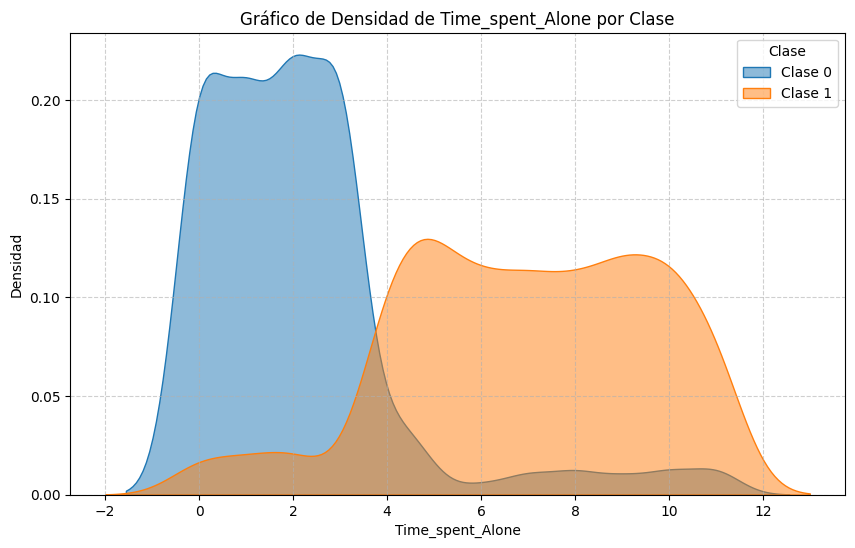


Creando gráficos de densidad para la columna: Social_event_attendance


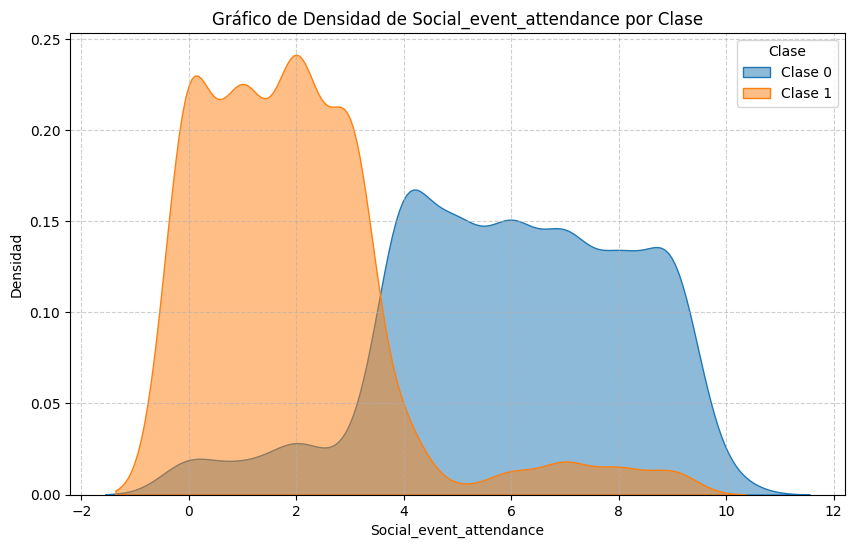


Creando gráficos de densidad para la columna: Going_outside


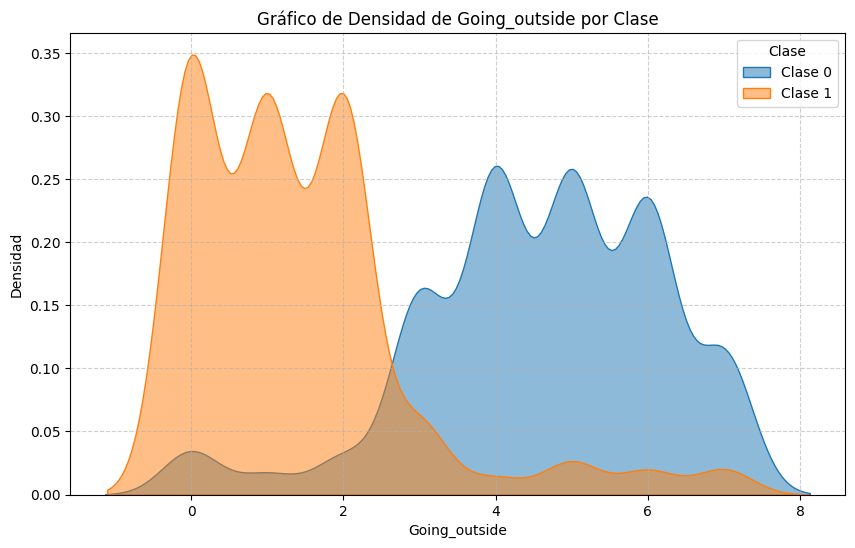


Creando gráficos de densidad para la columna: Friends_circle_size


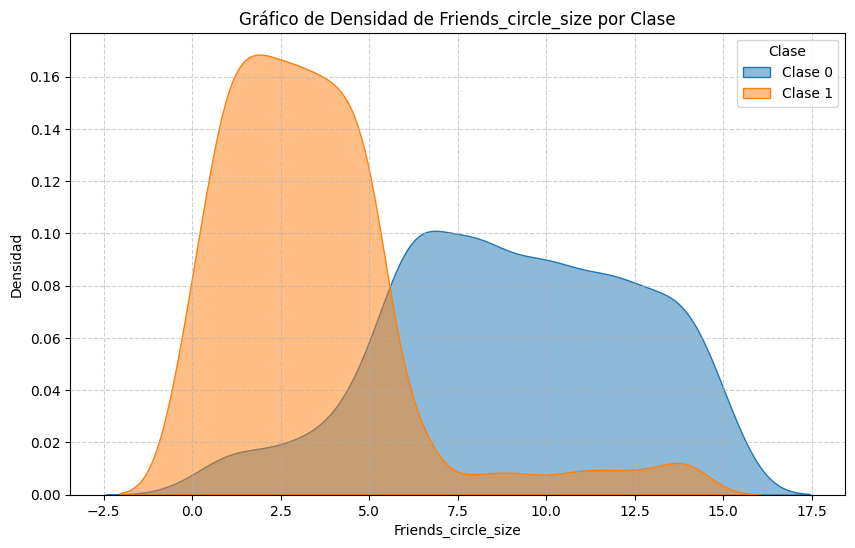


Creando gráficos de densidad para la columna: Post_frequency


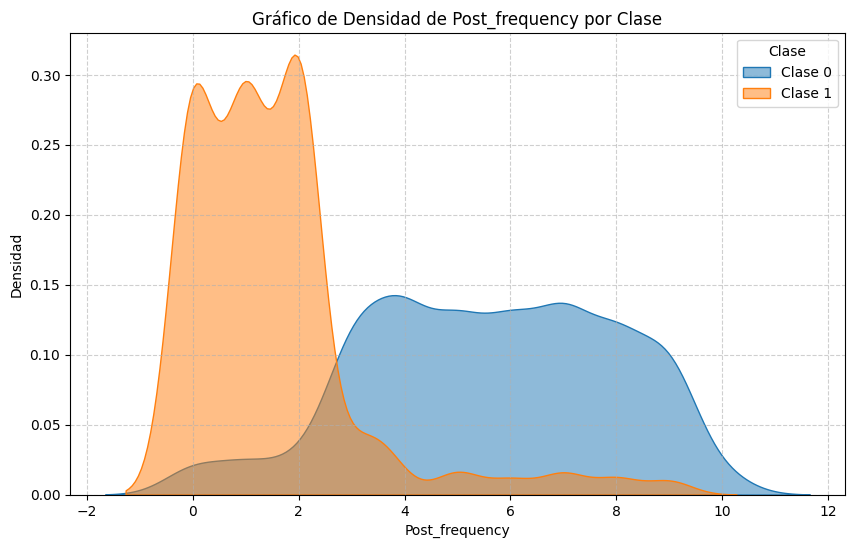


Proceso de gráficos de densidad por clase completado.


In [ ]:
# genera los graficos de densidad por clase

import matplotlib.pyplot as plt
# Iterar sobre cada columna numérica para generar gráficos de densidad por clase
class_column = 'Personality' # La columna que indica la clase

# Verificar que la columna de clase existe en el DataFrame
if class_column not in df_no_outliers.columns:
    print(f"Error: La columna de clase '{class_column}' no se encuentra en el DataFrame sin outliers.")
else:
    # Obtener las clases únicas en la columna de clase
    classes = df_no_outliers[class_column].unique()
    print(f"\nClases encontradas en la columna '{class_column}' (sin outliers): {classes}")

    # Iterar sobre cada columna numérica (usando las columnas numéricas originales antes de filtrar por varianza si quieres todas)
    # O usar solo las columnas numéricas usadas en el pairplot (top_5_numeric_cols)
    # Vamos a usar todas las columnas numéricas originales que quedaron después de la limpieza (numeric_cols)
    # Asegurarse de que las columnas existan en df_no_outliers
    numeric_cols_present = [col for col in numeric_cols if col in df_no_outliers.columns]

    for col in numeric_cols_present:
        print(f"\nCreando gráficos de densidad para la columna: {col}")
        plt.figure(figsize=(10, 6)) # Ajusta el tamaño de la figura según sea necesario

        # Iterar sobre cada clase y graficar su densidad
        for cls in classes:
            # Filtrar el DataFrame para la clase actual
            df_class = df_no_outliers[df_no_outliers[class_column] == cls]

            # Usar seaborn.kdeplot para graficar la densidad
            sns.kdeplot(df_class[col], label=f'Clase {cls}', fill=True, alpha=0.5) # 'fill=True' para rellenar el área bajo la curva, 'alpha' para transparencia

        plt.title(f'Gráfico de Densidad de {col} por Clase')
        plt.xlabel(col)
        plt.ylabel('Densidad') # Eje Y es la densidad
        plt.legend(title='Clase') # Mostrar la leyenda para identificar las clases
        plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula
        plt.show()

    print("\nProceso de gráficos de densidad por clase completado.")

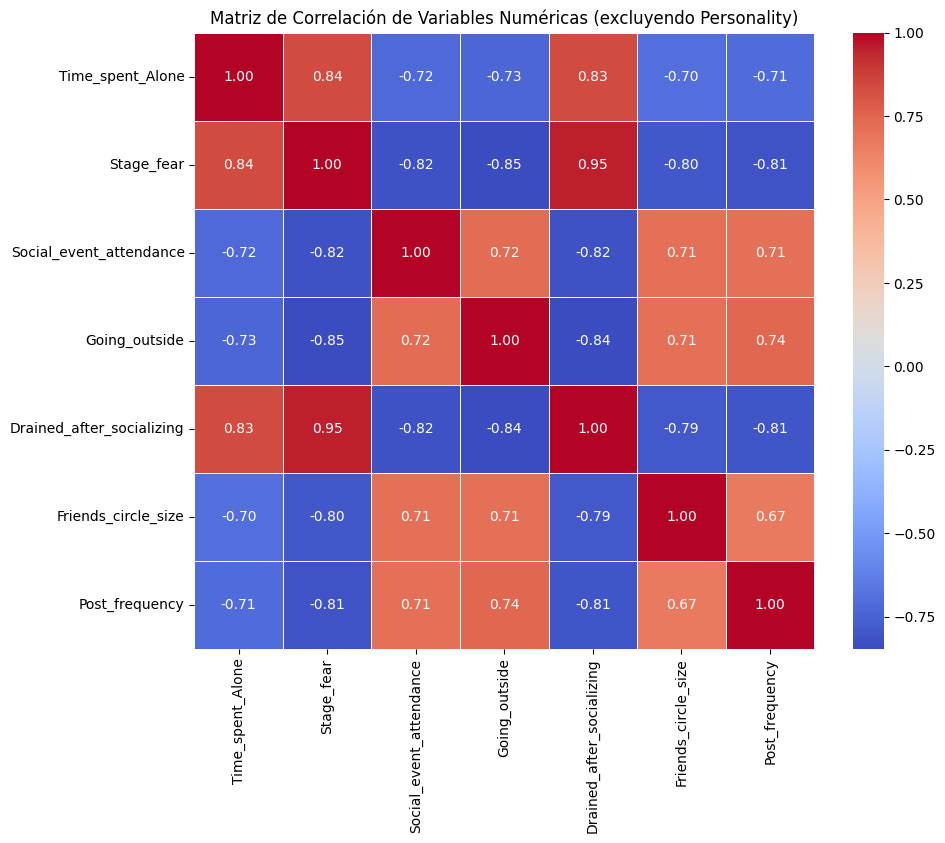

In [ ]:
# Usa `corr()` para obtener la matriz de correlación de las variables numéricas y `heatmap()` para visualizarla. No incluya la variable objetivo

import pandas as pd
import matplotlib.pyplot as plt
# Obtener la matriz de correlación de las variables numéricas, excluyendo 'Personality'
# Asegúrate de usar el DataFrame final limpio
numeric_cols_for_corr = [col for col in df_no_outliers.columns if pd.api.types.is_numeric_dtype(df_no_outliers[col]) and col != 'Personality']

correlation_matrix = df_no_outliers[numeric_cols_for_corr].corr()

# Visualizar la matriz de correlación usando heatmap
plt.figure(figsize=(10, 8)) # Ajusta el tamaño según sea necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas (excluyendo Personality)')
plt.show()

In [ ]:
# Apply chi-square on categorical variables considering that the target variable is “Result”. Provide a report of which variables are significant and which are not

import pandas as pd
from scipy.stats import chi2_contingency

# Make sure 'Result' is in the categorical columns or treat it as such
# If 'Result' was moved to numeric previously, we consider it categorical again
# based on the task (Chi-square analysis on Categorical variables vs. Result)
if 'Personality' not in categorical_cols and 'Personality' in df.columns:
     # If 'Result' is in the DataFrame but not in categorical_cols, add it
     # This can happen if 'Result' was treated as numeric in some part of the previous code
     categorical_cols.append('Personality')
     if 'Personality' in numeric_cols:
          numeric_cols.remove('Personality') # Remove from numeric if it was there by mistake for this analysis


# List to store Chi-square test results
chi2_results = {}

# Significance level (alpha)
alpha = 0.05

print("\nPerforming Chi-square Test for Categorical Variables vs. Result:")
print("-" * 60)

# Iterate over each categorical variable (excluding 'Result')
for col in categorical_cols:
    if col != 'Personality':
        print(f"Analyzing the relationship between '{col}' and 'Personality'...")

        # Create contingency table
        contingency_table = pd.crosstab(df[col], df['Personality'])

        # Make sure the table is not empty
        if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
            # Perform Chi-square test
            chi2, p, dof, ex = chi2_contingency(contingency_table)

            # Store results
            chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}

            # Print result and determine significance
            print(f"  Chi-square statistic: {chi2:.4f}")
            print(f"  p-value: {p:.4f}")
            print(f"  Degrees of freedom: {dof}")

            if p < alpha:
                print(f"  Conclusion: '{col}' is SIGNIFICANT (p < {alpha}) - There is a statistically significant association with 'Personality'.")
            else:
                print(f"  Conclusion: '{col}' is NOT SIGNIFICANT (p >= {alpha}) - No sufficient evidence of association with 'Personality'.")
        else:
            print(f"  Cannot perform Chi-square test for '{col}': The contingency table is too small ({contingency_table.shape}).")

        print("-" * 60)

# Final report of significant and non-significant variables
print("\nSignificance Report (Alpha level = 0.05):")
print("-" * 40)

significant_vars = [var for var, res in chi2_results.items() if res['p_value'] < alpha]
non_significant_vars = [var for var, res in chi2_results.items() if res['p_value'] >= alpha]

print("Significant Categorical Variables (association with 'Personality'):")
if significant_vars:
    for var in significant_vars:
        print(f"- {var} (p-value: {chi2_results[var]['p_value']:.4f})")
else:
    print("No categorical variable was statistically significant.")

print("\nNon-Significant Categorical Variables (no association with 'Personality'):")
if non_significant_vars:
    # Also include variables that could not be tested
    non_significant_vars.extend([col for col in categorical_cols if col != 'Personality' and col not in chi2_results])
    for var in set(non_significant_vars): # Use set to avoid duplicates if a variable could not be tested
        if var in chi2_results:
            print(f"- {var} (p-value: {chi2_results[var]['p_value']:.4f})")
        else:
            print(f"- {var} (Could not be tested, insufficient contingency table)")
else:
    print("All tested categorical variables were statistically significant.")

print("-" * 40)



Realizando Test de Chi-cuadrado para Variables Categóricas vs. Result:
------------------------------------------------------------
Analizando la relación entre 'Stage_fear' y 'Personality'...
  Estadístico Chi-cuadrado: 1700.7751
  Valor p: 0.0000
  Grados de libertad: 1
  Conclusión: 'Stage_fear' es SIGNIFICATIVA (p < 0.05) - Hay una asociación estadísticamente significativa con 'Personality'.
------------------------------------------------------------
Analizando la relación entre 'Drained_after_socializing' y 'Personality'...
  Estadístico Chi-cuadrado: 1693.9527
  Valor p: 0.0000
  Grados de libertad: 1
  Conclusión: 'Drained_after_socializing' es SIGNIFICATIVA (p < 0.05) - Hay una asociación estadísticamente significativa con 'Personality'.
------------------------------------------------------------

Reporte de Significancia (Nivel alpha = 0.05):
----------------------------------------
Variables Categóricas Significativas (asociación con 'Personality'):
- Stage_fear (Valor p: 

In [ ]:
# Apply Anova on the numerical variables considering that the target variable is “Personality”. Provide the report of which variables are significant and which are not

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Make sure to use the clean DataFrame (without nulls or duplicates)
# We will use df_cleaned for ANOVA, since that is where we initially removed nulls and duplicates.
# ANOVA requires numeric data, and Personality is the grouping variable.
# If 'Personality' is already numerically encoded (as done with LabelEncoder), it is ready.
# If 'Personality' was originally categorical, we need it to be the grouping variable.
# Assuming 'Personality' is the grouping variable (categorical) and the others are continuous numerical.
# We will revert 'Personality' to its original type if it was encoded for ANOVA,
# since statsmodels OLS expects the grouping variable as a factor (categorical).

# If 'Personality' was numerically encoded before, we need to use the original column or ensure statsmodels treats it as a factor.
# The best practice for OLS with grouping variables is to have the column as type 'object' or 'category'.
# We will use the original dataframe to obtain the 'Personality' column before encoding if necessary.

try:
    df_original_for_anova = pd.read_csv('personality_datasert.csv' , sep =",")
    # Remove nulls and duplicates to match df_cleaned or df_no_outliers
    df_original_for_anova.dropna(inplace=True)
    df_original_for_anova.drop_duplicates(inplace=True)

    # Add the cleaned numeric columns from df_no_outliers or df_cleaned to the dataframe with the original Personality column
    # It is crucial that the indices match after removing nulls and duplicates.
    # A safe way is to use df_no_outliers and convert 'Personality' back to categorical if it was encoded.
    # Or, if df_original_for_anova has the same records as df_no_outliers in the same order, we can simply use it.
    # For simplicity and safety, we will use df_no_outliers and convert 'Personality' to 'category'.

    df_anova = df_no_outliers.copy()
    # Convert 'Personality' column to 'category' type so OLS treats it as a grouping variable
    df_anova['Personality'] = df_anova['Personality'].astype('category')

    # List of numeric variables to test (excluding 'Personality' if by mistake it was there)
    # We use the original numeric columns that survived cleaning
    numeric_cols_for_anova = [col for col in numeric_cols if col in df_anova.columns and col != 'Personality']

    print("\nApplying ANOVA to Numerical Variables with 'Personality' as Group Factor:")
    print("-" * 80)

    anova_results = {}
    alpha = 0.05

    # Iterate over each numeric variable
    for col in numeric_cols_for_anova:
        print(f"Performing ANOVA for the numeric variable: '{col}'")

        # Create the OLS (Ordinary Least Squares) model
        # The formula is 'numeric_variable ~ C(group_variable)'
        # C() tells statsmodels to treat 'Personality' as a categorical variable
        formula = f'{col} ~ C(Personality)'

        try:
            # Fit the model
            model = ols(formula, data=df_anova).fit()

            # Perform ANOVA
            anova_table = sm.stats.anova_lm(model, typ=2) # typ=2 for type II anova (recommended for unbalanced models)

            # Extract the p-value for the grouping variable ('C(Personality)')
            p_value = anova_table['PR(>F)']['C(Personality)']

            # Store the results
            anova_results[col] = {'p_value': p_value}

            # Print the result and determine significance
            print(f"  p-value for 'C(Personality)': {p_value:.4f}")

            if p_value < alpha:
                print(f"  Conclusion: '{col}' is SIGNIFICANT (p < {alpha}) - The mean of '{col}' differs significantly across 'Personality' groups.")
            else:
                print(f"  Conclusion: '{col}' is NOT SIGNIFICANT (p >= {alpha}) - No sufficient evidence that the mean of '{col}' differs across 'Personality' groups.")

            # Optional: If the variable is significant, perform post-hoc tests (Tukey HSD) to see which pairs of groups differ
            if p_value < alpha:
                print(f"  Performing post-hoc Tukey HSD for '{col}'...")
                # Ensure there are at least two groups in 'Personality'
                if len(df_anova['Personality'].unique()) > 1:
                    try:
                        tukey_result = pairwise_tukeyhsd(endog=df_anova[col], groups=df_anova['Personality'], alpha=alpha)
                        print(tukey_result)
                    except ValueError as e:
                        print(f"  Warning when performing Tukey HSD: {e} (There may be groups with very few data points or zero variance)")
                else:
                    print("  Cannot perform Tukey HSD: There is only one group in 'Personality'.")


        except Exception as e:
            print(f"  Error performing ANOVA for '{col}': {e}")
            anova_results[col] = {'p_value': None, 'error': str(e)}


        print("-" * 80)

    # Final report of significant and non-significant variables according to ANOVA
    print("\nSignificance Report of Numerical Variables (ANOVA with Alpha level = 0.05):")
    print("-" * 60)

    significant_vars_anova = [var for var, res in anova_results.items() if res.get('p_value') is not None and res['p_value'] < alpha]
    non_significant_vars_anova = [var for var, res in anova_results.items() if res.get('p_value') is not None and res['p_value'] >= alpha]
    error_vars_anova = [var for var, res in anova_results.items() if res.get('p_value') is None]

    print("Significant Numerical Variables (mean differs across 'Personality' groups):")
    if significant_vars_anova:
        for var in significant_vars_anova:
            print(f"- {var} (p-value: {anova_results[var]['p_value']:.4f})")
    else:
        print("No numerical variable was statistically significant according to ANOVA.")

    print("\nNon-Significant Numerical Variables (mean does not differ significantly across 'Personality' groups):")
    if non_significant_vars_anova:
        for var in non_significant_vars_anova:
            print(f"- {var} (p-value: {anova_results[var]['p_value']:.4f})")
    else:
        print("All tested numerical variables were statistically significant.")

    if error_vars_anova:
        print("\nNumerical Variables that had errors during ANOVA:")
        for var in error_vars_anova:
             print(f"- {var} (Error: {anova_results[var]['error']})")


    print("-" * 60)


except FileNotFoundError:
    print("Error: The file 'personality_datasert.csv' was not found. Make sure the file is in the correct location or provide the full path.")
except Exception as e:
    print(f"An error occurred during the ANOVA process: {e}")



Aplicando ANOVA a Variables Numéricas con 'Personality' como Factor de Grupo:
--------------------------------------------------------------------------------
Realizando ANOVA para la variable numérica: 'Time_spent_Alone'
  Valor p para 'C(Personality)': 0.0000
  Conclusión: 'Time_spent_Alone' es SIGNIFICATIVA (p < 0.05) - La media de 'Time_spent_Alone' difiere significativamente entre los grupos de 'Personality'.
  Realizando post-hoc Tukey HSD para 'Time_spent_Alone'...
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1   4.7959   0.0 4.6031 4.9886   True
-------------------------------------------------
--------------------------------------------------------------------------------
Realizando ANOVA para la variable numérica: 'Social_event_attendance'
  Valor p para 'C(Personality)': 0.0000
  Conclusión: 'Social_event_attendance' es SIGNIFICATIVA (p < 0.05) - La media 

In [ ]:
# necesito almacenar el dataframe que tengo hasta el momento en un csv, y una lista con el nombre de las variables numéricas y de las categóricas

# Guardar el DataFrame final en un archivo CSV
df.to_csv('dataframe_final.csv', index=False,sep=",")

# Guardar las listas de variables numéricas y categóricas
import json

variables_info = {
    'numeric_variables': numeric_cols,
    'categorical_variables': categorical_cols
}

with open('variables_info.json', 'w') as f:
    json.dump(variables_info, f, indent=4)

print("\nDataFrame final guardado como 'dataframe_final.csv'")
print("Listas de variables numéricas y categóricas guardadas como 'variables_info.json'")


DataFrame final guardado como 'dataframe_final.csv'
Listas de variables numéricas y categóricas guardadas como 'variables_info.json'
